# ASTR19 Group Project - Tides

## Contributions

This project was done in a group environment with Justin, Alexis, and Ernani.
All the code and ideas were distributed fairly among the group.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, interpolate
%matplotlib inline

In [2]:
### 1 ###
# get data
days, time, height = np.loadtxt('ASTR19_F23_group_project_data.txt', skiprows=3, unpack=True, usecols=(0, 1, 2), dtype=str)

# define function to convert data points to hours
def convert_to_hours(days_hours_and_minutes):
    hours = []
    for day, hour, mins in days_hours_and_minutes:
        hour = int(hour) + int(mins) / 60
        hour += (int(day) - 1) * 24
        hours.append(hour)
    return np.array(hours)

# each element is a list [day, hour, minutes]
days_hours_and_minutes = [[days[i]] + time[i].split(':') for i in range(len(time))]

# values for our x-axis
x = convert_to_hours(days_hours_and_minutes)

# convert height to float
# print(type(height), "height:")
y = height.astype(np.float64)

### Plot the data y(height) vs x(hours)

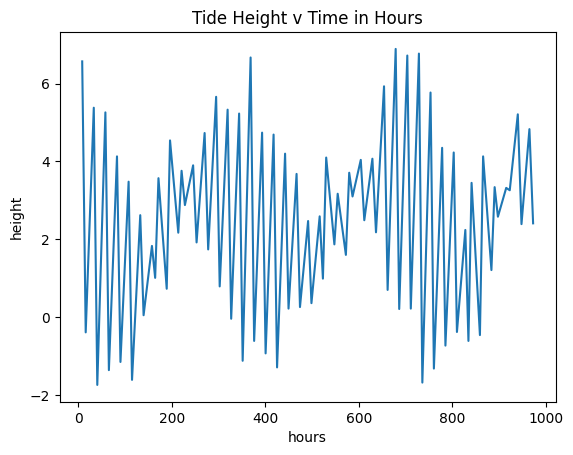

In [3]:
# plot y (height) vs. x(hours)
plt.plot(x, y)
plt.xlabel('hours')
plt.ylabel('height')
plt.title('Tide Height v Time in Hours') 
plt.show()

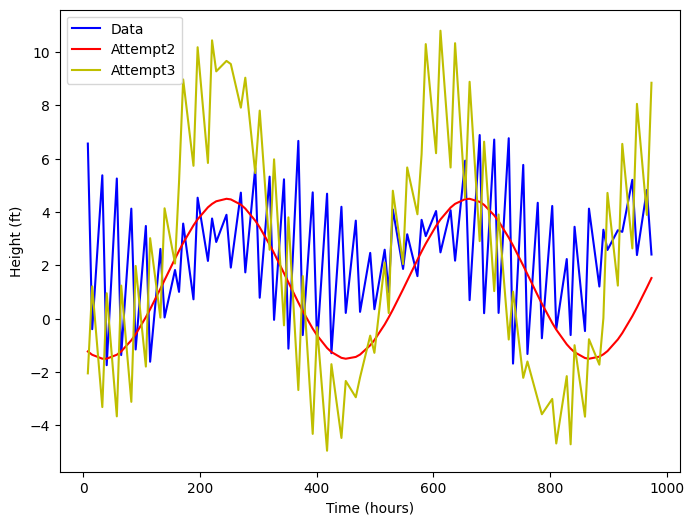

In [4]:
# first attempt
def sin(x, a, b):
    frequency = (2 * np.pi) / 25
    return a * (np.sin(x * frequency + b)) + 1.5

# second attempt for smoother curve
def sin2(x, a, b):
    frequency = (2 * np.pi) / (26 * 16)
    return a * (np.sin(x * frequency + b)) + 1.5

# add both together for third attempt
def sin3(x, a1, b1, a2, b2):
    frequency1 = (2 * np.pi) / 26
    frequency2 = (2 * np.pi) / (26 * 15)
    return (a1 * (np.sin(x * frequency1 + b1)) + 1.5) + (a2 * (np.sin(x * frequency2 + b2)) + 1.5)

# try a wavelength
attempt = sin(x, 3, 400)
attempt2 = sin2(x, 3, 400)
attempt3 = sin3(x, 3, 400, 5, 400)

# plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(x, y, 'b-', label='Data')
ax.plot(x, attempt2, 'r-', label='Attempt2')
ax.plot(x, attempt3, 'y-', label='Attempt3')

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Height (ft)')
ax.legend()

plt.show()

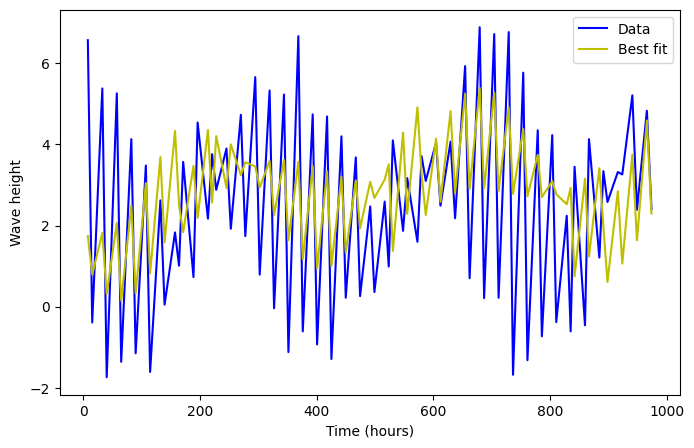

In [5]:
### 2 ###
#define our function to optimize. 
def sin3(x, a1, b1, a2, b2):
    frequency1 = (2 * np.pi) / 26
    frequency2 = (2 * np.pi) / (26 * 15)
    return (a1 * (np.sin(x * frequency1 + b1)) + 1.5) + (a2 * (np.sin(x * frequency2 + b2)) + 1.5)
    
# optimize best fit and use to get values for y.
params_3, params_cov_3 = optimize.curve_fit(sin3, x, y, sigma=0.25)
a1_fit, b1_fit, a2_fit, b2_fit = params_3
y_fit_3 = sin3(x, a1_fit, b1_fit, a2_fit, b2_fit)

# plot the function and the data 
fig = plt.figure(figsize=(8, 5))

ax = fig.add_subplot(111)
ax.plot(x, y, 'b-', label='Data')
# ax.plot(x, y_fit_1, 'r-', label='Fit 1')
# ax.plot(x, y_fit_2, 'g-', label='Fit 2')
ax.plot(x, y_fit_3, 'y-', label='Best fit')

ax.set_ylabel('Wave height')
ax.set_xlabel('Time (hours)')
ax.legend()

# save the fig to best-fit.pdf
plt.savefig('best-fit.pdf', bbox_inches='tight', dpi=600)

plt.show()

## Is the scatter in the data larger than the assumed experimental error?
Yes, the intrinisic scatter in the data is larger than the assumed experimental error of 0.25
The error that we calculated from the data is |-0.30459135141707955| which is greater than 0.25

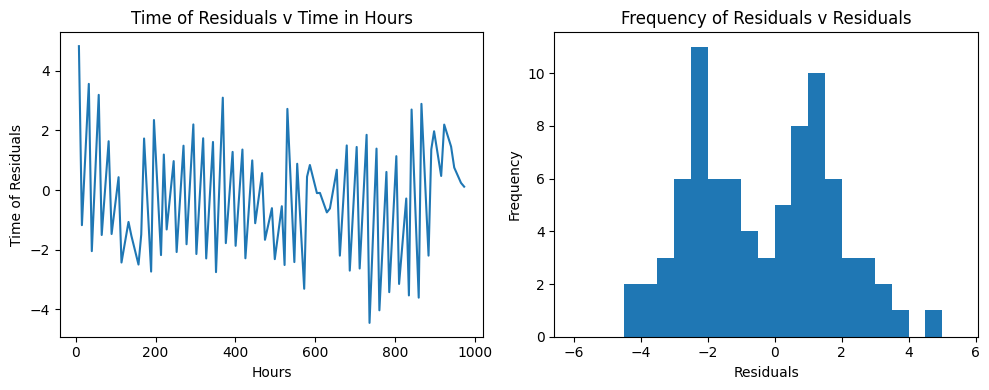

In [6]:
### 3 ###
# residuals
residuals = []
i = 0
for real, fit in zip(y, y_fit_3):
    residuals.append(real - fit)
    i += 1

residuals = np.array(residuals, dtype='float64')

width = 0.5
bins = np.arange(-6, 6, width)

fig = plt.figure(layout='tight', figsize=(10, 4))

ax1= fig.add_subplot(1, 2, 1)
ax1.plot(x, residuals, label='residuals')
ax1.set_ylabel('Time of Residuals')
ax1.set_xlabel('Hours')
ax1.set_title('Time of Residuals v Time in Hours')

ax2= fig.add_subplot(1, 2, 2)
ax2.hist(residuals, bins=bins)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Residuals')
ax2.set_title('Frequency of Residuals v Residuals')

# save the fig
plt.savefig('residuals.pdf', bbox_inches='tight', dpi=600)
plt.show()

In [7]:
# Calculate standard deviation
standard_deviation = np.std(residuals)
dev_yfit3 = np.std(y_fit_3)

print("Standard Deviation of model:", dev_yfit3)
print("Standard Deviation of residuals:", standard_deviation)
print("Expected error:", 0.25)
print("Error we got:", np.mean(residuals))

Standard Deviation of model: 1.2336929030336983
Standard Deviation of residuals: 2.0682639700609022
Expected error: 0.25
Error we got: -0.30459135156022454


Z Score: 2.037983749407934


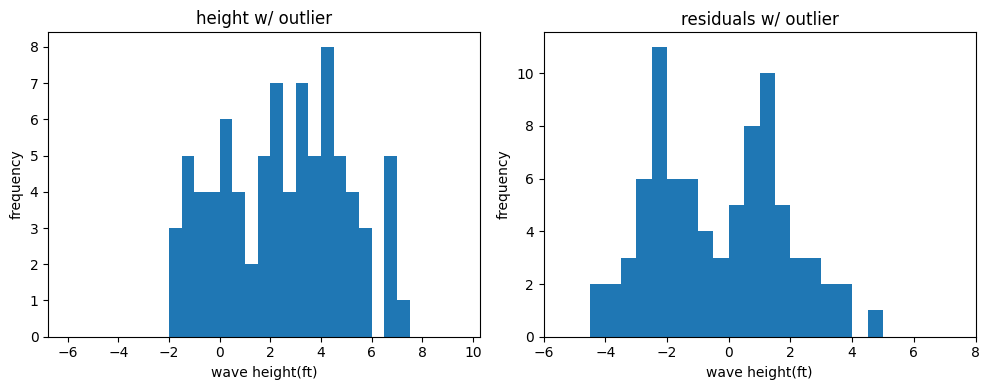

In [8]:
### 4 ###
# add 2ft to data
std = np.std(y)
mean = np.mean(y)
y[26] += 2

# calculate Z score
z_score = (y[26] - mean) / std
print("Z Score:", z_score)

# residuals
residuals = []
i = 0
for real, fit in zip(y, y_fit_3):
    residuals.append(real - fit)
    i += 1

out_residuals = np.array(residuals, dtype='float64')

# replot
width = 0.5
bins = np.arange(-6, 10, width)
fig = plt.figure(layout='tight', figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(y, bins=bins)
ax1.set_ylabel('frequency')
ax1.set_xlabel('wave height(ft)')
ax1.set_title('height w/ outlier')

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(out_residuals, bins=bins)
ax2.set_ylabel('frequency')
ax2.set_xlabel('wave height(ft)')
ax2.set_title('residuals w/ outlier')
ax2.set_xlim(-6, 8)

# save the fig
plt.savefig('outlier.pdf', bbox_inches='tight', dpi=600)

plt.show()